In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# 1. Load dữ liệu và one‑hot nhãn 3 loài
df = pd.read_csv('iris.csv')
species = df['species'].unique()
mapping = {s:i for i,s in enumerate(species)}
y_int = df['species'].map(mapping).values                # (150,)
# one-hot: (150, 3)
Y = np.zeros((len(y_int), len(species)))
for i, yi in enumerate(y_int):
    Y[i, yi] = 1

In [5]:
# 2. Chỉ chọn 2 đặc trưng petal_length và petal_width
X = df[['petal_length','petal_width']].values           # shape (150,2)

In [6]:
# 3. Khởi tạo W (3×2) và b (3,)
n_classes, n_features = len(species), X.shape[1]
W = np.random.randn(n_classes, n_features) * 0.01
b = np.zeros(n_classes)

In [8]:
# 4. Định nghĩa softmax và loss
def softmax(z):
    # z: (n_samples, n_classes)
    z = z - np.max(z, axis=1, keepdims=True)
    exp_z = np.exp(z)
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

def compute_loss(Y_true, P):
    # Y_true, P: (n_samples, n_classes)
    return -np.mean(np.sum(Y_true * np.log(P + 1e-15), axis=1))

In [21]:
# 5. Huấn luyện bằng batch Gradient Descent
lr = 0.1
epochs = 1000
loss_history = []

for epoch in range(epochs):
    # forward
    Z = X.dot(W.T) + b           # (150,3)
    P = softmax(Z)               # (150,3)
    loss = compute_loss(Y, P)
    loss_history.append(loss)
    
    # gradient
    dZ = (P - Y) / X.shape[0]    # (150,3)
    dW = dZ.T.dot(X)             # (3,2)
    db = np.sum(dZ, axis=0)      # (3,)
    
    # update
    W -= lr * dW
    b -= lr * db
    
    if epoch % 200 == 0:
        print(f"Epoch {epoch:4d}: Loss = {loss:.4f}")


Epoch    0: Loss = 0.1277
Epoch  200: Loss = 0.1267
Epoch  400: Loss = 0.1258
Epoch  600: Loss = 0.1248
Epoch  800: Loss = 0.1239


In [22]:
# 6. Dự đoán
Z_final = X.dot(W.T) + b
P_final = softmax(Z_final)
y_pred = np.argmax(P_final, axis=1)

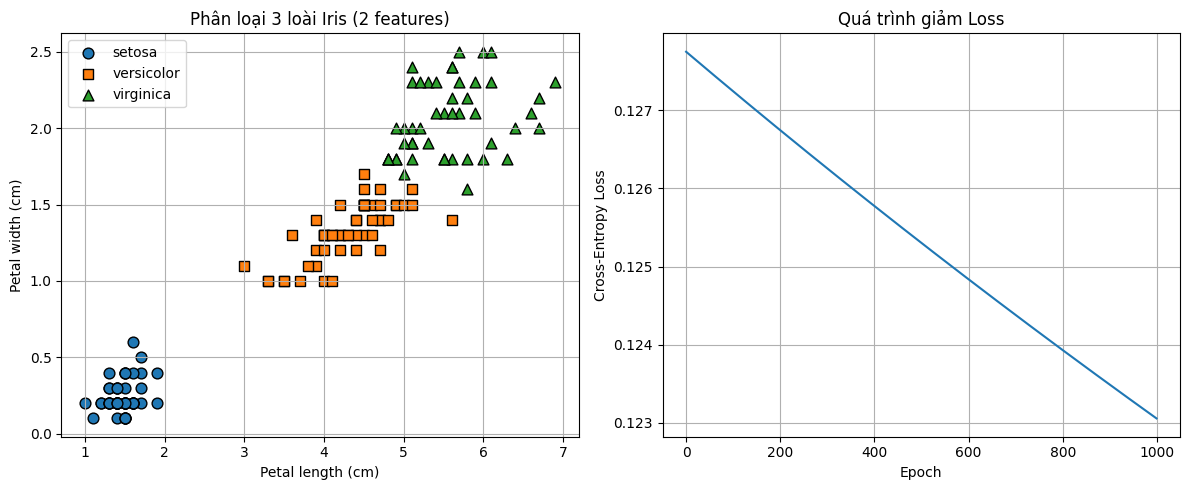

In [23]:
# 7. Vẽ kết quả
plt.figure(figsize=(12,5))

# (a) Scatter petal_length vs petal_width, tô màu theo dự đoán
plt.subplot(1,2,1)
markers = ['o','s','^']
colors  = ['r','g','b']
for cls in range(n_classes):
    idx = np.where(y_pred == cls)
    plt.scatter(X[idx,0], X[idx,1],
                marker=markers[cls],
                label=species[cls],
                edgecolor='k',
                s=60)
plt.xlabel('Petal length (cm)')
plt.ylabel('Petal width (cm)')
plt.title('Phân loại 3 loài Iris (2 features)')
plt.legend()
plt.grid()

# (b) Loss theo epochs
plt.subplot(1,2,2)
plt.plot(loss_history)
plt.xlabel('Epoch')
plt.ylabel('Cross‑Entropy Loss')
plt.title('Quá trình giảm Loss')
plt.grid()

plt.tight_layout()
plt.show()

In [25]:
# 8. In độ chính xác
accuracy = np.mean(y_pred == y_int)
print(f"\nAccuracy trên toàn bộ tập: {accuracy*100:.2f}%")



Accuracy trên toàn bộ tập: 96.00%
